## Informe de Análisis Exploratorio de Datos (EDA) y Diseño de Modelo

En este informe, se realizará un análisis exploratorio detallado de los datos del dataset **Bank Marketing** proporcionado por una institución bancaria portuguesa. Este dataset contiene información sobre las campañas de marketing realizadas por la entidad, que se basaron en llamadas telefónicas, para predecir si un cliente suscribirá un depósito a plazo (**'y'**). El objetivo es predecir la variable **'y'** (sí/no) utilizando técnicas de Machine Learning.

El informe estará dividido en dos partes:
1. **Análisis Exploratorio de Datos (EDA)**
2. **Diseño del Modelo de Predicción**

In [294]:
# Aqui mostraremos las librerías importadas que vamos a utilizar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve


Investigando sobre el dataset en la web de la [Universidad de California](https://archive.ics.uci.edu/dataset/222/bank+marketing), tenemos la siguiente información sobre las columnas del dataset:

### **Variables de entrada:**  
#### **Datos del cliente:**  
1. **age** (numeric) – Edad del cliente.  
2. **job** (categorical) – Tipo de empleo (*"admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services"*).  
3. **marital** (categorical) – Estado civil (*"married", "divorced", "single"*; *"divorced"* incluye divorciados y viudos).  
4. **education** (categorical) – Nivel educativo (*"unknown", "secondary", "primary", "tertiary"*).  
5. **default** (binary) – ¿Tiene crédito en impago? (*"yes", "no"*).  
6. **balance** (numeric) – Saldo medio anual en euros.  
7. **housing** (binary) – ¿Tiene préstamo hipotecario? (*"yes", "no"*).  
8. **loan** (binary) – ¿Tiene préstamo personal? (*"yes", "no"*).  

#### **Datos del último contacto en la campaña actual:**  
9. **contact** (categorical) – Tipo de comunicación (*"unknown", "telephone", "cellular"*).  
10. **day** (numeric) – Día del mes en que se realizó el último contacto.  
11. **month** (categorical) – Mes del último contacto (*"jan", "feb", "mar", ..., "nov", "dec"*).  
12. **duration** (numeric) – Duración del último contacto en segundos.  

#### **Otras variables:**  
13. **campaign** (numeric) – Número de contactos realizados en la campaña actual con este cliente (incluye el último contacto).  
14. **pdays** (numeric) – Días transcurridos desde el último contacto en una campaña anterior (*-1 significa que el cliente no fue contactado antes*).  
15. **previous** (numeric) – Número de contactos previos con este cliente en campañas anteriores.  
16. **poutcome** (categorical) – Resultado de la campaña de marketing anterior (*"unknown", "other", "failure", "success"*).  

### **Variable de salida (objetivo):**  
17. **y** (binary) – ¿El cliente suscribió un depósito a plazo? (*"yes", "no"*).

### **1. Análisis Exploratorio de Datos (EDA)**

El análisis exploratorio de datos es crucial para comprender la estructura de los datos, identificar problemas de calidad de los datos, detectar patrones y, finalmente, tomar decisiones informadas sobre cómo preparar los datos para el modelado.

#### **Carga de los Datos**

Comenzamos cargando el conjunto de datos y observando sus primeras filas para obtener una visión general. Este paso nos proporciona una visión general de las primeras filas del conjunto de datos, lo que nos permite observar las columnas y su formato.

In [295]:
# cargamos el dataset en un datafram
dataframe = pd.read_csv("dataset/bank.csv", sep=";")

# mostramos las 10 primeras lineas
dataframe.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [296]:
# proporción de los valores de salida
dataframe["y"].value_counts(normalize=True)*100

y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64

#### **Inspección de la Estructura del Dataset**

A continuación, inspeccionamos la estructura del dataset para comprender mejor los tipos de variables y la cantidad de datos.

- **`df.info()`**: Muestra información sobre el tipo de datos de cada columna, la cantidad de valores no nulos y el uso de memoria.
- **`df.describe()`**: Proporciona estadísticas descriptivas para las columnas numéricas, como la media, desviación estándar, valores mínimos y máximos.
- **`df.shape`**: Vemos el tamaño del dataset

Podemos observar que el dataset tiene un total de **45,211 registros** y **17 columnas**. De estas, las primeras 16 columnas corresponden a las características del modelo, mientras que la última columna es el resultado o variable objetivo. Tras aplicar el método **`info()`**, observamos que las 17 columnas tienen valores de dos tipos: **numéricos (int64)** y **categóricos (object)**. Finalmente, utilizamos **`describe()`** para obtener información estadística sobre las características numéricas, lo que nos permite entender mejor la distribución y las propiedades de las variables cuantitativas.

In [297]:
# tamaño del dataset
dataframe.shape

(45211, 17)

In [298]:
# vemos un resumen del dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [299]:
# resumen estadísticos de columnas numéricas
dataframe.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### **Identificación de Valores Nulos y Manejo de Datos Faltantes**

La siguiente etapa es verificar si hay valores nulos en el conjunto de datos. Los valores nulos pueden distorsionar el análisis y la predicción, por lo que deben ser gestionados.

Como se indicó en la descripción del dataset proporcionada por la web, algunas variables tienen valores nulos representados por "-1". En particular, en el caso de las columnas, se observa que los valores nulos en la columna pdays están representados por "-1", lo cual indica que el cliente no ha sido contactado en campañas anteriores. Dado que esta información es relevante y refleja correctamente la situación, se decide mantener estos valores tal como están, sin realizar ningún cambio en la columna pdays.

In [300]:
# mostramos registros que contienen algun valor nulo (-1)
dataframe[(dataframe == -1).any(axis=1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


#### **Análisis de la Distribución de las Variables**

Es fundamental explorar la distribución de las variables, tanto numéricas como categóricas. Esto nos permite identificar posibles problemas como **skewness** (asimetría) en las distribuciones numéricas o clases desbalanceadas en las variables categóricas.

Para ello, vamos a utilizar tres gráficos:
- **Histograma**: Nos permite ver la distribución de la **edad** de los clientes.
- **Boxplot**: Ayuda a detectar posibles **outliers** en la variable **balance**.
- **Gráfico de barras**: Muestra la frecuencia de cada **tipo de trabajo** en los datos.

Como se puede observar en la gráfica de distribución de la edad, la mayoría de las personas se encuentran en el rango de edad de 25 a 60 años aproximadamente. Por otro lado, el gráfico de caja revela una gran cantidad de valores atípicos en la variable de balance, tanto por encima del percentil 75 como por debajo del percentil 25. Finalmente, en la última gráfica, se puede ver que los trabajos más frecuentes son "blue collar", "technician" y "management".

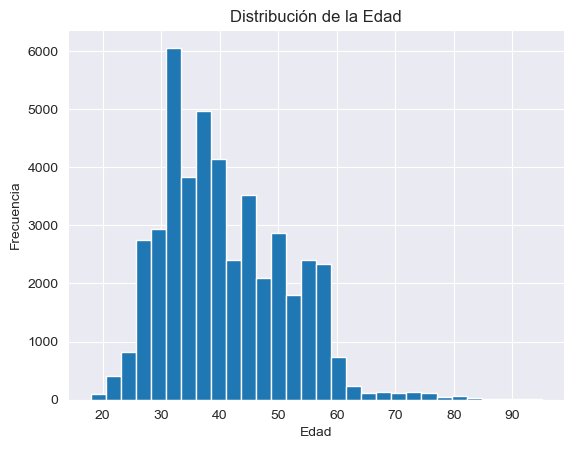

In [301]:
# Distribución de la variable 'age'
dataframe['age'].hist(bins=30)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

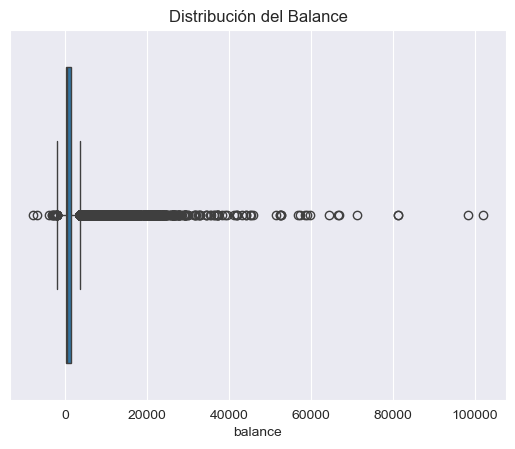

In [302]:
# Boxplot para la variable 'balance'
sns.boxplot(x=dataframe['balance'])
plt.title('Distribución del Balance')
plt.show()

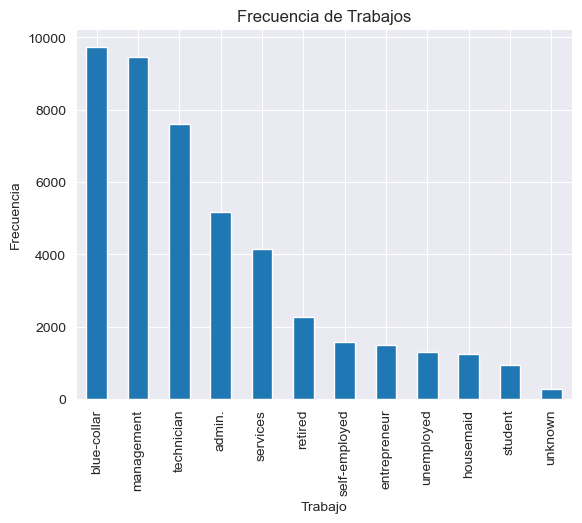

In [303]:
# Gráfico de barras para la variable 'job'
dataframe['job'].value_counts().plot(kind='bar')
plt.title('Frecuencia de Trabajos')
plt.xlabel('Trabajo')
plt.ylabel('Frecuencia')
plt.show()

#### **Identificación de Outliers**

Los **outliers** (valores atípicos) pueden afectar el rendimiento del modelo. Identificamos y tratamos los outliers para asegurar que los modelos no sean distorsionados por valores anómalos.

Utilizamos el **rango intercuartil (IQR)** para identificar y eliminar los valores atípicos en la variable **balance**. Después de mostrar nuevamente la gráfica de distribución del balance, decidimos eliminar los outliers, quedándonos con un total de 40,000 registros. Esto significa que hemos eliminado 7,000 registros que se encontraban fuera del rango intercuartil (entre el 25% y el 75%) de los datos del balance.

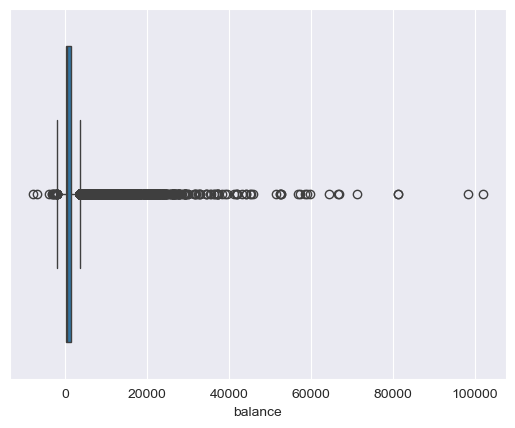

In [304]:
# Usamos un boxplot para ver los outliers en la variable 'balance'
sns.boxplot(x=dataframe['balance'])
plt.show()

# Eliminar outliers si es necesario
Q1 = dataframe['balance'].quantile(0.25)
Q3 = dataframe['balance'].quantile(0.75)
IQR = Q3 - Q1
dataframe_limpio_outliers = dataframe[(dataframe['balance'] >= Q1 - 1.5 * IQR) & (dataframe['balance'] <= Q3 + 1.5 * IQR)]

In [305]:
dataframe_limpio_outliers.shape

(40482, 17)

In [306]:
# Vemos la proporción de valores que puede tomar cada variable
for column in dataframe_limpio_outliers.columns:
    print(dataframe_limpio_outliers[column].value_counts(normalize=True)*100)
    print("*"*40)

age
32    4.651450
31    4.503236
33    4.441480
34    4.332790
35    4.303147
        ...   
90    0.004940
92    0.004940
93    0.004940
88    0.004940
94    0.002470
Name: proportion, Length: 77, dtype: float64
****************************************
job
blue-collar      22.111062
management       20.100291
technician       16.928511
admin.           11.674324
services          9.493108
retired           4.728027
self-employed     3.426214
entrepreneur      3.297762
unemployed        2.840769
housemaid         2.712317
student           2.072526
unknown           0.615088
Name: proportion, dtype: float64
****************************************
marital
married     59.774715
single      28.491675
divorced    11.733610
Name: proportion, dtype: float64
****************************************
education
secondary    52.388716
tertiary     28.348402
primary      15.224050
unknown       4.038832
Name: proportion, dtype: float64
****************************************
default
no     98.0

#### **Análisis de Correlación**

Examinamos la **correlación** entre las variables numéricas para identificar posibles relaciones entre ellas que podrían ser útiles al construir el modelo.
Este mapa de calor nos permite observar qué variables están fuertemente correlacionadas, lo cual es útil para tomar decisiones sobre qué variables incluir en el modelo.

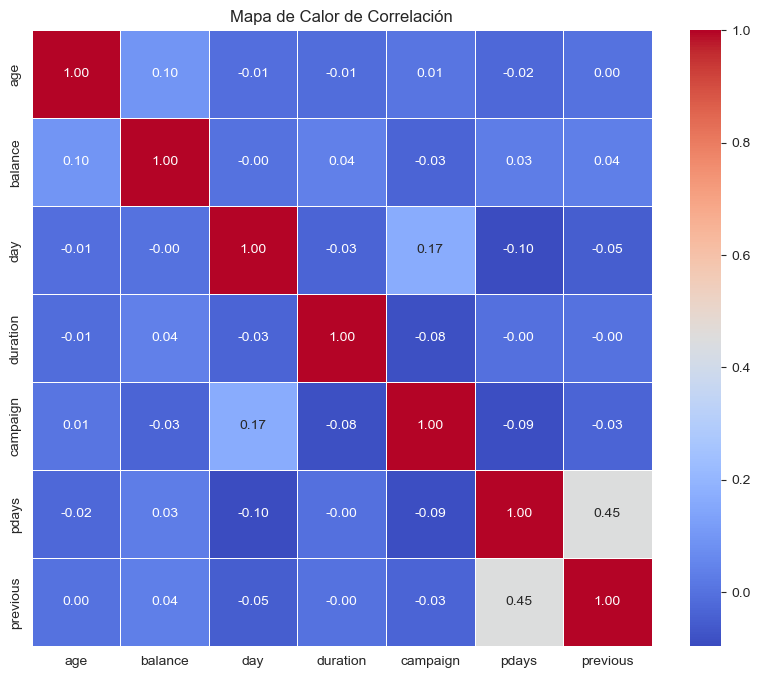

In [307]:
# Matriz de correlación
dataframe_numerico = dataframe_limpio_outliers[["age","balance","day","duration","campaign","pdays","previous"]]
corr_matrix = dataframe_numerico.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor de Correlación")
plt.show()

#### **Análisis de la Variable Objetivo**

Finalmente, exploramos la distribución de la variable objetivo **'y'**, que indica si un cliente ha suscrito o no al depósito a plazo. Esto es clave para entender si las clases están balanceadas o desbalanceadas.

- **`df['y'].value_counts(normalize=True)`**: Muestra la proporción de clases en la variable objetivo **'y'** (sí/no).
- El gráfico de barras visualiza la distribución entre clientes que han suscrito y los que no.

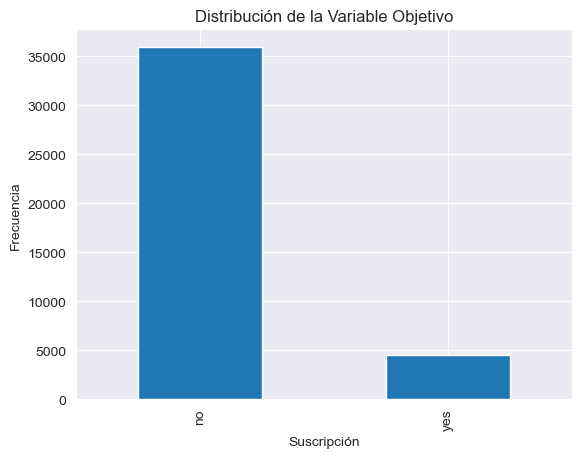

In [308]:
# Distribución de la variable 'y'
dataframe_limpio_outliers['y'].value_counts(normalize=True)

# Gráfico de barras para 'y'
dataframe_limpio_outliers['y'].value_counts().plot(kind='bar')
plt.title('Distribución de la Variable Objetivo')
plt.xlabel('Suscripción')
plt.ylabel('Frecuencia')
plt.show()

### **2. Preparación de los Datos para el Modelo**

Ahora que hemos explorado los datos, preparamos el conjunto de datos para construir el modelo. Esto incluye **codificar las variables categóricas**, **escalar las variables numéricas** y dividir el conjunto de datos en **entrenamiento y prueba**.

#### **Codificación de Variables Categóricas y Numéricas**
- LabelEncoding: con esta vamos a asignar un número a cada valor. Se usa para variables categóricas de tipo ordinales (las que siguen un orden). Por ejemplo, las tallas: XS, S, M, L... pues se le asigna siguiendo una escala se le asigna un número.
- OneHotEncoding / Variable Dummy: lo que hace es crear x columnas mas del dataset y pone 0 cuando no sea y 1 cuando esté presente.
- Standar Scaler: este lo usaremos cuando son variables numericas, ya que acota los datos a media 0 y desviacion 1.

#### **División del dataset**
Dividimos el dataset en dos conjuntos: el de entrenamiento y el de test (este último se utilizará para la validación del modelo)
- test_size=0.2: 20% de los datos para prueba, 80% para entrenamiento.
- random_state=42: Semilla para hacer la división reproducible.
- shuffle=True: Baraja los datos antes de dividirlos.
- stratify=y: Mantiene la proporción de clases en ambos conjuntos.

In [309]:
y = dataframe_limpio_outliers['y']
x = dataframe_limpio_outliers.drop('y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

# Preprocesador
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), make_column_selector(dtype_include=['int64', 'float64'])),
    ('cat', OneHotEncoder(drop='first'), make_column_selector(dtype_include=['object']))
])

### **3. Diseño del Modelo**

Se ha utilizado el algoritmo Random Forest para abordar el problema de clasificación. El modelo se integra en un pipeline, donde primero se aplica el preprocesamiento de datos (mediante un ColumnTransformer) y luego se ajusta un modelo de RandomForestClassifier. El objetivo es optimizar los hiperparámetros del modelo, por lo que se emplea GridSearchCV, que realiza una búsqueda en cuadrícula sobre una serie de combinaciones de hiperparámetros, con el fin de encontrar la mejor configuración del modelo.

Los hiperparámetros que se optimizan son:

n_estimators: El número de árboles en el bosque (en este caso, 100 y 200).
criterion: La función de calidad para la división de los nodos, con opciones 'gini' y 'entropy'.
max_depth: La profundidad máxima de los árboles (20, 30 y 40).
max_features: El número de características a considerar para dividir un nodo, con opciones 'sqrt' y 'log2'.
El proceso de entrenamiento se realiza con 5 pliegues de validación cruzada, lo que ayuda a evaluar el rendimiento del modelo de manera más robusta. Posteriormente, se ajusta el modelo con los mejores hiperparámetros obtenidos de la búsqueda en cuadrícula.

Una vez entrenado el modelo, se realiza la predicción sobre el conjunto de prueba y se evalúa su rendimiento utilizando el reporte de clasificación (con métricas como precisión, recall y f1-score) y la matriz de confusión.

Finalmente, se visualiza la curva de aprendizaje del modelo, mostrando cómo evoluciona la puntuación de precisión del modelo tanto en el conjunto de entrenamiento como en el de validación, en función del tamaño del conjunto de entrenamiento. Esto permite analizar si el modelo está aprendiendo correctamente y si existe sobreajuste o subajuste.

In [310]:
# Crear un pipeline con preprocesamiento y modelo
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Definir los hiperparámetros a optimizar para GridSearchCV
hiperparametros_rf = {
    'classifier__n_estimators': [100, 200],  # Número de árboles en el bosque
    'classifier__criterion': ['gini', 'entropy'],  # Función de calidad para la división de los nodos
    'classifier__max_depth': [20, 30, 40],  # Profundidad máxima de los árboles
    'classifier__max_features': ['sqrt', 'log2'],  # Número de características a considerar para dividir un nodo
}

# Realizar una búsqueda en cuadrícula utilizando 5 pliegues (cross-validation)
grid_search_rf = GridSearchCV(estimator=pipeline_rf, param_grid=hiperparametros_rf, 
                              cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo con GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search_rf.best_params_)

# Predecir con el modelo optimizado
y_pred_rf = grid_search_rf.predict(X_test)

# Evaluación del modelo
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_rf))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores hiperparámetros: {'classifier__criterion': 'gini', 'classifier__max_depth': 40, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 200}
Reporte de clasificación:
              precision    recall  f1-score   support

          no       0.93      0.98      0.95      7193
         yes       0.69      0.41      0.51       904

    accuracy                           0.91      8097
   macro avg       0.81      0.69      0.73      8097
weighted avg       0.90      0.91      0.90      8097

Matriz de confusión:
[[7023  170]
 [ 533  371]]


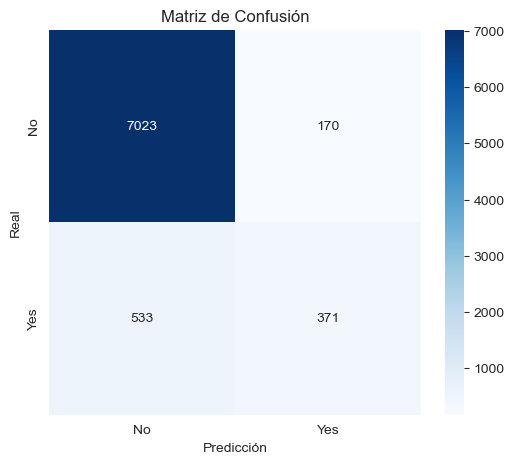

In [311]:
# Generar matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf)

# Crear gráfico de la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

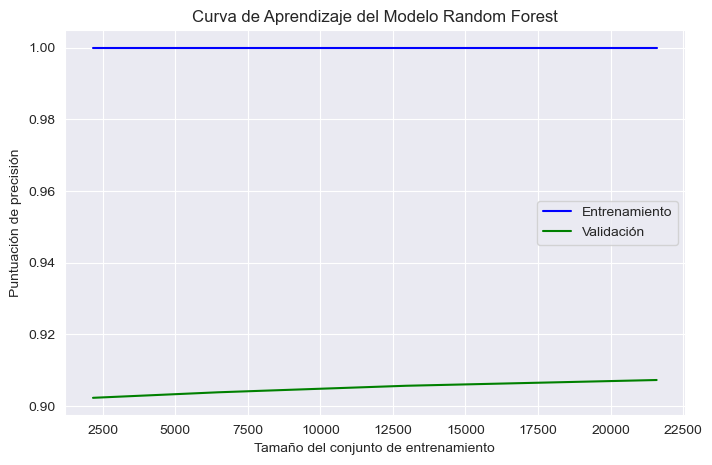

In [312]:
# Visualización de la curva de aprendizaje optimizada
train_sizes, train_scores, test_scores = learning_curve(
    grid_search_rf.best_estimator_, X_train, y_train, 
    cv=3,  # Reducimos los pliegues de validación cruzada
    n_jobs=1,  # Limitamos los procesos en paralelo
    train_sizes=[0.1, 0.3, 0.6, 1.0]  # Menos puntos de entrenamiento
)

# Promedio de las puntuaciones de entrenamiento y prueba
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, label='Entrenamiento', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validación', color='green')
plt.title('Curva de Aprendizaje del Modelo Random Forest')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Puntuación de precisión')
plt.legend()
plt.grid(True)
plt.show()

### CONCLUSIÓN FINAL

El modelo Random Forest ha logrado una precisión general del 91 %, lo que indica un buen desempeño en términos globales. Sin embargo, al analizar las métricas por clase, se observa un desequilibrio en la capacidad de predicción. La clase mayoritaria ("no") presenta una alta precisión (93 %) y un excelente recall (98 %), lo que sugiere que el modelo clasifica correctamente la mayoría de los casos negativos. Por otro lado, la clase minoritaria ("yes") tiene una precisión moderada (69 %) pero un recall bajo (41 %), lo que indica que el modelo no detecta correctamente una gran parte de los casos positivos, clasificándolos erróneamente como negativos. Este comportamiento es común en conjuntos de datos desbalanceados y puede mejorarse mediante técnicas como el ajuste de pesos en las clases, el uso de métodos de sobremuestreo o submuestreo, o la exploración de otros algoritmos que manejen mejor el desbalance. La matriz de confusión refuerza este análisis, mostrando que 533 instancias de la clase "yes" fueron clasificadas incorrectamente como "no", esto se debe, sobretodo, al gran desbalanceo de datos de salida que hay.